In [21]:
import fantasy_stats_def as fs
import pandas as pd
import matplotlib.pyplot as plt

#### Get all info (only run when new info to retrieve) ####

In [2]:
all_lineups_df = fs.get_all_lineups()

In [3]:
league_stats_df_by_gameweek = fs.get_league_stats_df_by_gameweek(all_lineups_df)
league_stats_df_by_gameweek_with_bench = fs.get_league_stats_df_by_gameweek(all_lineups_df, True)

In [4]:
league_points_df = fs.get_league_points_df(cumulative = True, totals = False)
league_positions_df = fs.get_league_positions_df()
league_standings_df = pd.concat([league_points_df, league_positions_df],keys=['points','position']).swaplevel(0,1).groupby(level=[0,1]).sum()

#### Play with info ####

In [6]:
league_standings_df

1    2    3    4
Fat    points    48   73  123  194
       position   1    6    5    1
Emma   points    43  105  132  180
       position   2    1    2    2
Claire points    39   85  115  177
       position   3    2    6    3
Matt   points    22   78  144  167
       position   7    5    1    4
Luke   points    27   84  128  163
       position   5    3    3    5
George points    26   64   90  146
       position   6    7    7    6
Olivia points    31   82  123  141
       position   4    4    4    7

<AxesSubplot:>

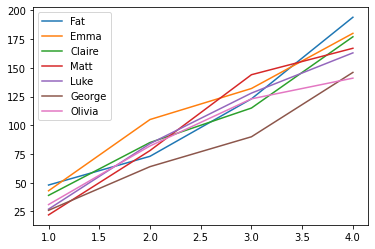

In [48]:
league_points_df.transpose().plot()

In [9]:
all_lineups_df['Olivia',3]

,name,team,position,value,selected %,minutes,goals scored,goals conceded,penalties missed,penalties saved,assists,saves,own goals,yellow cards,red cards,foul points,total points
383,Lloris,Spurs,Goalkeeper,5.5,5.06357,90,0,1,0,0,0,0,0,0,0,0,2
239,Justin,Leicester,Defender,4.7,20.1304,90,0,2,0,0,0,0,0,0,0,0,1
77,Lamptey,Brighton,Defender,4.6,6.29994,90,0,3,0,0,1,0,0,0,0,0,4
156,Keane,Everton,Defender,5,3.99291,90,0,1,0,0,0,0,0,0,0,0,2
235,Barnes,Leicester,Midfielder,7,3.5403,90,0,2,0,0,0,0,0,0,0,0,2
306,Rashford,Man Utd,Midfielder,9.5,5.33677,90,1,2,0,0,0,0,0,0,0,0,7
4,Aubameyang,Arsenal,Midfielder,11.9,28.6958,90,0,3,0,0,0,0,0,0,0,0,2
205,Costa,Leeds,Midfielder,5.6,8.28838,65,0,0,0,0,0,0,0,0,0,0,3
366,Ings,Southampton,Forward,8.4,17.0165,90,1,0,0,0,0,0,0,0,0,0,9
6,Lacazette,Arsenal,Forward,8.5,4.77972,73,1,2,0,0,0,0,0,0,0,0,7


In [11]:
league_stats_df_by_gameweek[4]

,active players,team,value,selected %,minutes,productivity,goals scored,goals conceded,goal difference,penalties missed,penalties saved,assists,saves,own goals,yellow cards,red cards,foul points,total points,weekly position
Fat,11,8,65.3,10.6771,957,0.074190,6,25,-19,0,0,5,3,0,1,0,1,71,1
Claire,11,9,69,8.21733,967,0.064116,3,20,-17,0,0,4,2,0,0,0,0,62,2
George,11,8,70.5,5.6228,802,0.069825,3,17,-14,0,0,4,2,0,0,0,0,56,3
Emma,10,8,73.9,9.422,758,0.063325,4,17,-13,0,0,1,0,0,3,0,3,48,4
Luke,11,9,76.4,15.4826,767,0.045632,3,21,-18,0,0,1,3,0,1,0,1,35,5
Matt,11,10,75.3,10.7647,973,0.023638,1,25,-24,0,0,0,2,0,0,0,0,23,6
Olivia,11,10,73.3,9.08965,881,0.020431,0,20,-20,0,0,0,6,0,0,0,0,18,7


In [14]:
league_stats_df_by_gameweek[4][['goals scored','goals conceded','goal difference','weekly position']].sort_values('goal difference', ascending=False)

,goals scored,goals conceded,goal difference,weekly position
Emma,4,17,-13,4
George,3,17,-14,3
Claire,3,20,-17,2
Luke,3,21,-18,5
Fat,6,25,-19,1
Olivia,0,20,-20,7
Matt,1,25,-24,6


In [19]:
df = fs.get_league_stats_df_by_stat(league_stats_df_by_gameweek_with_bench, 'penalties missed', 'total')
pd.concat([df,league_stats_df_by_gameweek_with_bench[fs.current_gameweek][['weekly position']]],axis=1)

,1,2,3,4,totals,weekly position
Fat,0,1,0,0,1,1
Luke,0,0,0,0,0,4
Emma,0,0,0,0,0,5
Olivia,0,0,0,0,0,7
Claire,0,0,0,0,0,2
Matt,0,0,0,0,0,6
George,0,0,0,0,0,3
